## Analyzing Financial Dataset with AI Tools

## 1. Introduction
This study aims to analyze financial datasets using AI tools, presenting the findings interactively through dashboards, visualizations, and live demonstrations. The research will also explore the functionality, applications, and implications of the AI tools used. The analysis will focus on five publicly available stocks: Nvidia, Meta, Adobe, PayPal, and Netflix. Stock data will be fetched from Yahoo Finance using the Yahoo Finance API.AI tools will be utilized specifically to identify patterns, predict price movements, and uncover actionable insights for investment strategies. A Random Forest machine learning model will be employed to predict price trends, i.e., whether prices will move up or down.The primary visualizations used to present the data will include cumulative stock price graphs, portfolio cumulative returns graphs, moving average plots, correlation plots, correlation heatmaps, and interactive dashboards.

## 2. Data Import and Cleaning
The data for the five stocks is imported from Yahoo Finance. The selected companies are; NVIDIA (NVDA), Meta (META), Netflix (NFLX), Adobe (ADBE), and PayPal (PYPL). The main objective in this part is to prepare the dataset for further analysis and machine learning applications. Yahoo Finance API is used to fetch historical stock data for the chosen companies from January 1, 2020, to November 18, 2024. The data is cleaning done by; filling the missing values using forward fill, standardizing the data, consilidating the data, and finally combining the cleaned data. The cleaned data is then stored in a new dataset called cleaned stock data.  

To effectively conduct this study, it is essential to install several Python packages that provide robust tools for data analysis, visualization, and machine learning. Each package serves a specific purpose in the workflow:
* pandas: Used for data manipulation and analysis, especially for handling stock data efficiently in tabular formats.
* numpy: Provides powerful numerical operations and support for handling large datasets, enabling fast computations.
* matplotlib & seaborn: These are essential for creating static and interactive visualizations, helping to explore trends and correlations in the data.
* yfinance: A dedicated library for fetching real-time and historical stock market data from Yahoo Finance.
* scikit-learn: Provides machine learning algorithms, such as the Random Forest model, for building predictive models and uncovering patterns in stock price movements.
* dash: A web-based framework to create interactive dashboards for presenting findings in a user-friendly manner.

Installing these packages ensures a seamless pipeline for gathering, analyzing, visualizing, and presenting financial data using AI tools.

In [1]:
!pip install yfinance seaborn scikit-learn matplotlib


     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ------------------------------- ------ 786.4/948.2 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   -- -------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.exe -m pip install --upgrade pip


In [138]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [153]:
# my chosen stocks
tickers = ['NVDA', 'META', 'NFLX', 'ADBE', 'PYPL']
stock_data = {}
### Downlowding
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start='2020-01-01', end='2024-11-18')

### Data cleaning and formatting
for ticker in tickers:
    stock_data[ticker].ffill(inplace=True)
    stock_data[ticker].bfill(inplace=True)
    stock_data[ticker].reset_index(inplace=True)
    # Date time formating to ensure 'Date' is a datetime column
    stock_data[ticker]['Date'] = pd.to_datetime(stock_data[ticker]['Date'])

### Feature scaling
scaler = StandardScaler()
for ticker in tickers:
    stock_data[ticker][['Close', 'Volume']] = scaler.fit_transform(stock_data[ticker][['Close', 'Volume']])

### Data combination 
combined_data = pd.DataFrame()
for ticker in tickers:
    temp_df = stock_data[ticker][['Date', 'Close']].copy()
    temp_df.rename(columns={'Close': f'{ticker}_Close'}, inplace=True)
    if combined_data.empty:
        combined_data = temp_df
    else:
        # combined_data = combined_data.sort_index()  # Sort the multi-index
        combined_data = pd.merge(combined_data, temp_df, on='Date', how='outer')

### Final cleaning missing values
combined_data.ffill(inplace=True)
combined_data.bfill(inplace=True)
combined_data.to_csv('cleaned_stock_data.csv', index=False)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\yudt\AppData\Local\Temp\ipykernel_7668\1454271521.py:30: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



## 3. Data Analysis
This part cover the analysis of the cleaned stock data extracted from our selected stocks. The data analysis involves descriptive statistics, correlations, and computation of  key indicators for individual stocks and the portfolio. The main objective of the analysis is to come up with insights on stock price behavior, relationships among the selected stocks, and the performance and risk of the portfolio. The descriptive statistics used include the count, mean, standard deviation, minimum, maximum, and percentiles. They are used to give a quick summary of the data distribution for each stock. The mean of our selected data is very close to zero because the data has been standardized.  

The correlation analysis is also done using the correlation matrix for the Close prices to identify relationships and co-movement among the stocks. Posistive correlations indicate stocks with parrallel or same direction movements while negative movements indicates stocks which do not have a similar movement trend.  

The other major data analysis performed was the use of technical indicators such as the daily returns indicators, simple moving average indicators (50 day and 200 day, and volatility indicators. Daily return indicators are used to determine short-term price movements by calculating the percentage change in closing prices. The 50 and 200 simple moving averages are used to identify the market trends and help in making tradinga and investment decisions. The volatility is dtermined using the 30-day rolling standard deviation of daily returns.  
    
Finally, portfolio analysis is done using portfolio daily returns and portfolio volatility. This study used equal weight portfolio in the porfolio analysis. The portfolio volatility is determined using standard deviation of portfolio returns. The calculated portfolio volatility from our portfolio is 78.65%. This is the combined risk level of the selected stocks. This indicates thta our portfolio has a significantly high risk due to high volatility.

Descriptive statistics for NVDA:
Ticker         NVDA
count   1228.000000
mean       0.000000
std        1.000407
min       -0.881726
25%       -0.637470
50%       -0.434410
75%        0.228522
max        3.197137


Descriptive statistics for META:
Ticker          META
count   1.228000e+03
mean   -1.157236e-16
std     1.000407e+00
min    -1.746512e+00
25%    -7.349053e-01
50%    -1.456589e-01
75%     3.989103e-01
max     2.566235e+00


Descriptive statistics for NFLX:
Ticker          NFLX
count   1.228000e+03
mean   -4.628943e-17
std     1.000407e+00
min    -2.070397e+00
25%    -7.226516e-01
50%     1.240939e-01
75%     6.666966e-01
max     2.660294e+00


Descriptive statistics for ADBE:
Ticker          ADBE
count   1.228000e+03
mean   -1.388683e-16
std     1.000407e+00
min    -2.042445e+00
25%    -9.049901e-01
50%     7.341128e-02
75%     6.622923e-01
max     2.241525e+00


Descriptive statistics for PYPL:
Ticker          PYPL
count   1.228000e+03
mean    9.257886e-17
std     1.000407e

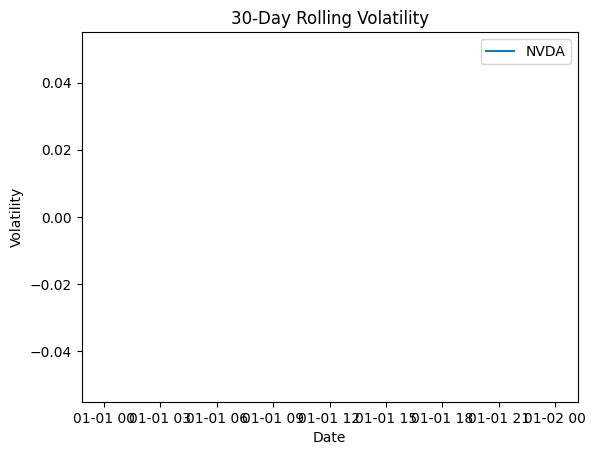

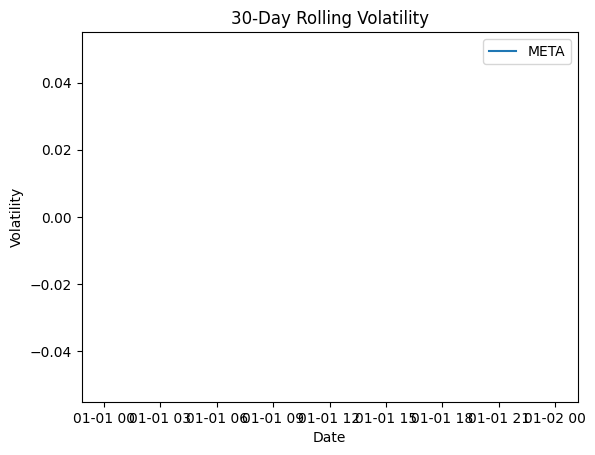

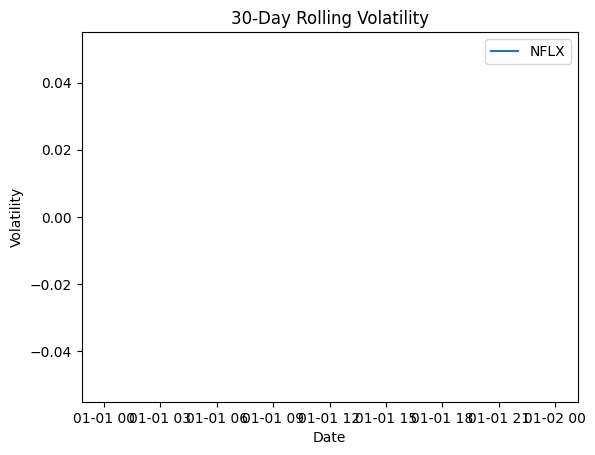

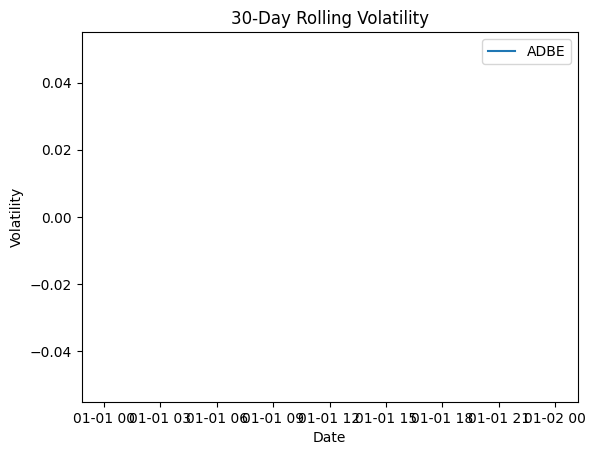

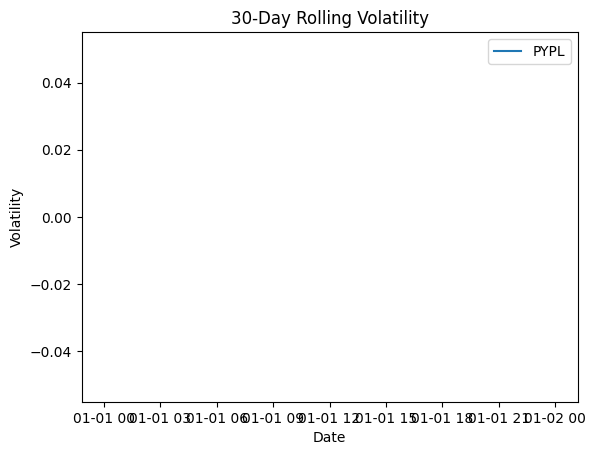

In [ ]:
### Summary statistics: e.g., mean, standard deviation, min, max, etc.
for ticker in tickers:
    print(f"Descriptive statistics for {ticker}:")
    print(stock_data[ticker]['Close'].describe())
    print("\n")

## Plot histograms
# for ticker in tickers:
#     # Plot histogram of the Close prices
#     plt.figure(figsize=(10, 6))
#     plt.hist(stock_data[ticker]['Close'], bins=30, edgecolor='black')
#     plt.title(f"Distribution of Close Prices for {ticker}")
#     plt.xlabel("Close Price")
#     plt.ylabel("Frequency")
#     plt.show()

## Generate kernel density estimates
# for ticker in tickers:
#     # Plot density plot for Close prices with the updated argument
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(stock_data[ticker]['Close'], fill=True)  # Use fill=True instead of shade=True
#     plt.title(f"Density Plot of Close Prices for {ticker}")
#     plt.xlabel("Close Price")
#     plt.ylabel("Density")
#     plt.show()

### Correlation analysis
close_prices = combined_data[[f'{ticker}_Close' for ticker in tickers]]
#correlation matrix
correlation_matrix = close_prices.corr()

###portfolio analysis
for ticker in tickers:
    # close_series = stock_data[ticker].xs('Close', level=0, axis=1).squeeze()
    stock_data[ticker]['Daily_Return'] = stock_data[ticker]['Close'].pct_change()

meta_data = stock_data['META'].copy() # Ensure we're working with a clean copy 
#print("Missing values before filling:", meta_data[['Close', 'Daily_Return']].isna().sum())
meta_data['Daily_Return'] = meta_data['Daily_Return'].ffill()  # Forward fill for 'Daily_Return'
meta_data['Daily_Return'] = meta_data['Daily_Return'].bfill()  # Backfill for 'Daily_Return'
stock_data['META'] = meta_data
#print("Missing values after filling:", meta_data[['Close', 'Daily_Return']].isna().sum()) # Check if all NaN values have been filled

for ticker in tickers:
    stock_data[ticker]['SMA_50'] = stock_data[ticker]['Close'].rolling(window=50).mean()
    stock_data[ticker]['SMA_200'] = stock_data[ticker]['Close'].rolling(window=200).mean()
for ticker in tickers:
    stock_data[ticker]['Volatility'] = stock_data[ticker]['Daily_Return'].rolling(window=30).std()
weights = [1/len(tickers)] * len(tickers)
#portfolio daily returns
combined_returns = close_prices.pct_change()
portfolio_returns = combined_returns.dot(weights)
#portfolio volatility
portfolio_volatility = portfolio_returns.std()
print(f"Portfolio Volatility: {portfolio_volatility}")

### CHECK  correction
### print("Meta DEBUGING")
# # Access 'Close' column from the MultiIndex DataFrame and convert it to a Series
# meta_close_series = stock_data['META'].xs('Close', level=0, axis=1).squeeze()
# print(type(meta_close_series))  # Should print <class 'pandas.core.series.Series'>
# print(meta_close_series.head())  # Display the first few values

# # Ensure 'Date' is a datetime column and set as index for stock_data
# stock_data['META']['Date'] = pd.to_datetime(stock_data['META']['Date'])
# stock_data['META'].set_index('Date', inplace=True)
# # Check the range of 'Close' during the spike period again
# print(stock_data['META'].loc['2024-01-01':'2024-12-31', 'Close'].describe())

# for ticker in tickers:
#     plt.plot(stock_data[ticker]['Date'], stock_data[ticker]['Volatility'], label=ticker)
#     plt.title("30-Day Rolling Volatility")
#     plt.xlabel("Date")
#     plt.ylabel("Volatility")
#     plt.legend()
#     plt.show()

# for ticker in tickers:
#     plt.figure(figsize=(10, 6))
#     plt.plot(stock_data[ticker]['Daily_Return'])
#     plt.xlabel("Date")
#     plt.ylabel("Daily Return")
#     plt.show()
    

## 4. Data Visualization
The major visualizations used in this section include: stock prices time series plots, moving averages, and correlation heatmaps. The stocks time series plots is used to show how stock prices have evolved over the specified period. The closing price  of each stock is used. The closing price of each stock is shown in the figure below for time period from 2020 to 2024. The correlation matrix of stock closing prices is visualized using a heatmap. Annotated values show the degree of correlation, and the color gradient represents the strength of relationships between stocks. Strong positive correlations indicate that stocks move together while low or negative correlations suggest diversification opportunities within the portfolio. The normalized closing prices are plotted along with their 50-day and 200-day Simple Moving Averages (SMA). This visualization highlights trends and potential crossover points, often used in trading strategies.

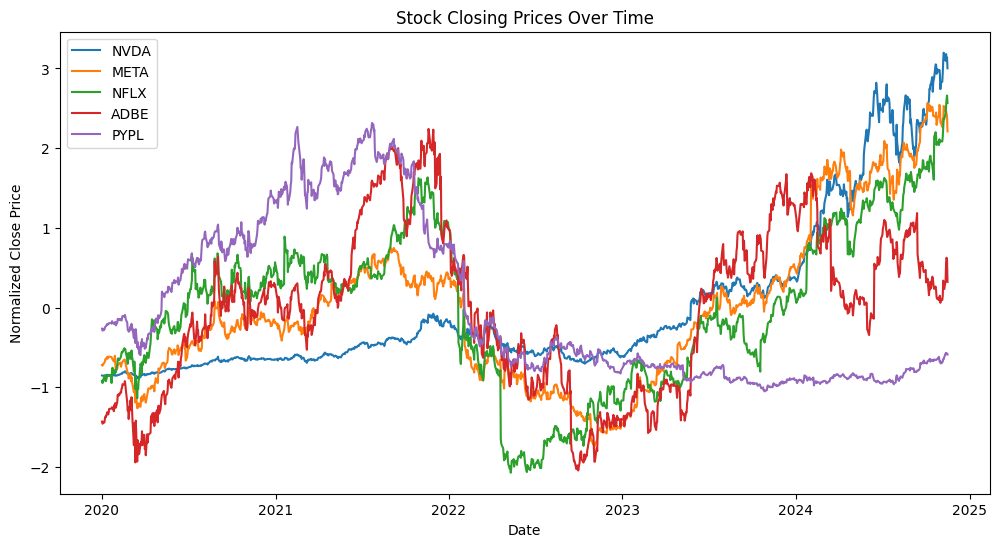

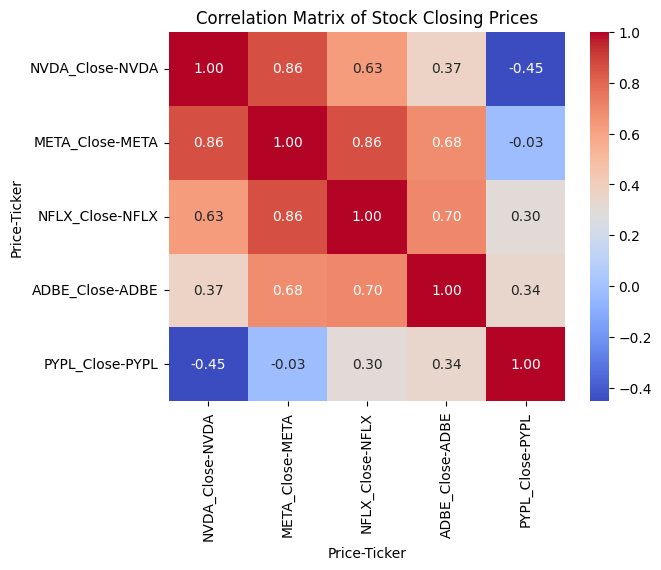

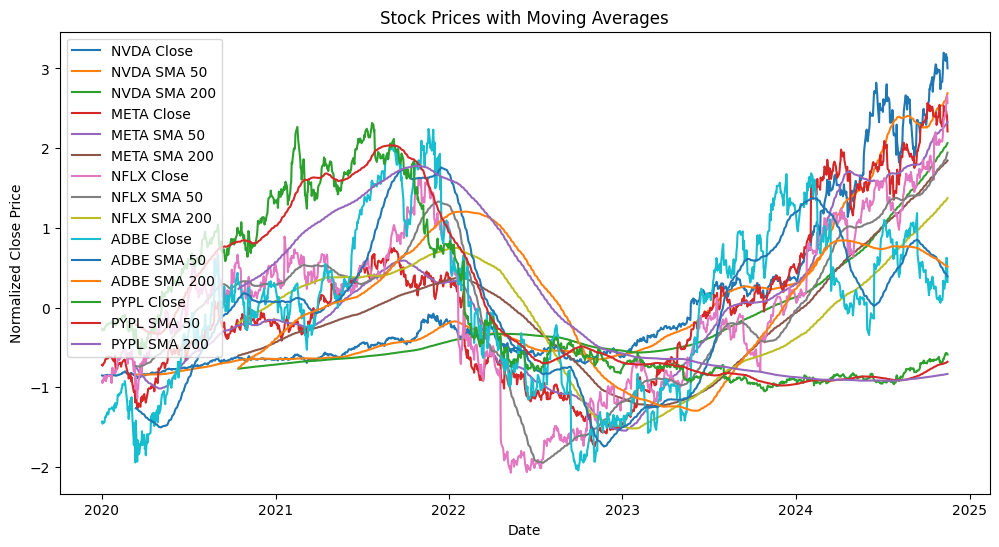

In [5]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(stock_data[ticker]['Date'], stock_data[ticker]['Close'], label=ticker)
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.show()
#correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Closing Prices')
plt.show()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(stock_data[ticker]['Date'], stock_data[ticker]['Close'], label=f'{ticker} Close')
    plt.plot(stock_data[ticker]['Date'], stock_data[ticker]['SMA_50'], label=f'{ticker} SMA 50')
    plt.plot(stock_data[ticker]['Date'], stock_data[ticker]['SMA_200'], label=f'{ticker} SMA 200')
plt.title('Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.show()

## 5: Application of AI
The main objective of this study was to analyze the use of AI tools in analyzing financial datasets. This section covers the use of AI specifically machine learning in analyzing financial datasets. This part will explore how machine learning models can be used in financial data analysis. This part will apply the use of Random Forest Regressor to predict the closing prices of the selected stock prices using engineered features. The process includes data preparation, feature engineering, model training, evaluation, and interpretation. Feature engineering is applied to create indicators such as: Daily Return, SMA_10, and Volatility_10. The faetures selected for the modeling include: SMA_10, Volatility_10, Daily_Return. The target variable is the closing price of NVIDIA stock. 

The next step is the model training. A Random Forest Regressor with 100 trees is trained on the training dataset. Data is split into training (80%) and testing (20%) sets. The model is then evaluated using Root Mean Square Error (RMSE) and R-squared (R²) metrics.  

RMSE measures prediction error, while R² indicates the proportion of variance in the target variable. The output of the model is the visualized using actual aginst predicted stock prices graph. The model evaluation gives a RMSE of 0.0674 which indicates a small average prediction error and R² of 0.9925 suggesting the model explains 99.25% of the variance in NVIDIA's closing prices. In terms of feature importance, SMA_10 dominates with 99.25% importance, showing it is the most influential feature for predicting prices while daily return have minimal impact, contributing 0.11%. This shows that SMA-10 has the highest influence on the stocks closing prices.  


RMSE: 0.0657
R-squared: 0.9950


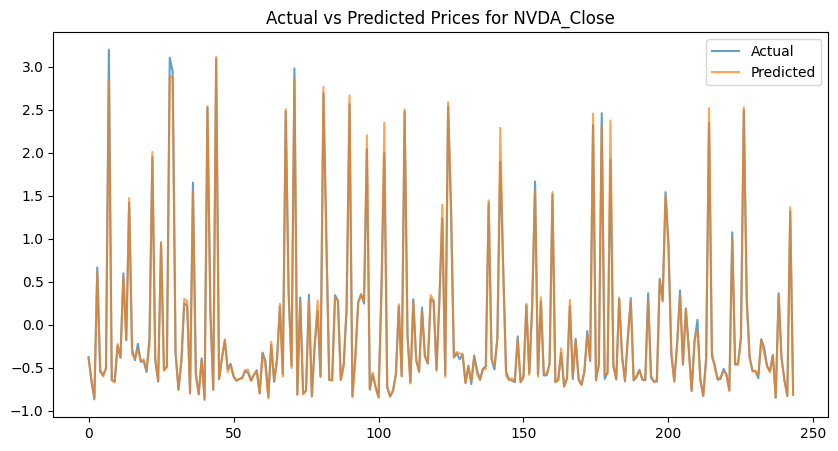

         Feature  Importance
0         SMA_10    0.992459
1  Volatility_10    0.006418
2   Daily_Return    0.001123


In [145]:
#The cleaned data
data = pd.read_csv('cleaned_stock_data.csv', parse_dates=['Date'])

### Data preparing
for column in data.columns:
    if '_Close' in column:
        data[column] = pd.to_numeric(data[column], errors='coerce')
target_ticker = 'NVDA_Close'
data.dropna(subset=[target_ticker], inplace=True)
### Feature Engineering
data['Daily_Return'] = data[target_ticker].pct_change()
data['SMA_10'] = data[target_ticker].rolling(window=10).mean()
data['Volatility_10'] = data['Daily_Return'].rolling(window=10).std()
# Drop NaN values
data.dropna(inplace=True)
# Features and target variable
features = ['SMA_10', 'Volatility_10', 'Daily_Return']
target = target_ticker  # Predicting the next closing price
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
### Predictions
y_pred = model.predict(X_test)
### Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.title(f"Actual vs Predicted Prices for {target_ticker}")
plt.legend()
plt.show()
# Feature Importance
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))


## 6. Dashboards
This part covers advanced visualization of our stocks using interactive dashboards. The dashboard includes multiple tabs for visualizing stock prices, portfolio cumulative returns, correlations, rolling volatility, and candlestick charts. The interactive dashboard helps in: Identifying trends and comparing performance across selected stocks, tracking overall portfolio growth and performance, monitoring risk levels through rolling volatility, and analyzing daily price movements clearly and interactively.

In [147]:
from dash import Dash, dcc, html, Input, Output
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
#Tickers
tickers = ['NVDA', 'META', 'NFLX', 'ADBE', 'PYPL']
dates = pd.date_range(start="2020-01-01", end="2024-11-18", freq="B")
np.random.seed(42)
stock_data = {ticker: pd.DataFrame({
    "Date": dates,
    "Open": np.random.uniform(100, 300, len(dates)),
    "High": np.random.uniform(150, 350, len(dates)),
    "Low": np.random.uniform(90, 250, len(dates)),
    "Close": np.random.uniform(120, 330, len(dates)),
    "SMA_50": np.random.uniform(110, 320, len(dates)),
    "SMA_200": np.random.uniform(100, 310, len(dates)),
    "Volatility": np.random.uniform(0.02, 0.05, len(dates)),
    "Daily_Return": np.random.normal(0, 0.02, len(dates))
}) for ticker in tickers}

combined_data = pd.concat(
    [stock_data[ticker][['Date', 'Close']].rename(columns={'Close': f'{ticker}_Close'}) for ticker in tickers], axis=1)
combined_data['Date'] = dates
portfolio_weights = np.ones(len(tickers)) / len(tickers)
portfolio_returns = combined_data[[f"{ticker}_Close" for ticker in tickers]].pct_change().mean(axis=1)
#Dash App
app = Dash(__name__)
# Layout
app.layout = html.Div([
    html.H1("Advanced Stock and Portfolio Dashboard", style={'textAlign': 'center'}),
    dcc.Tabs([
        dcc.Tab(label="Stock Prices", children=[
            dcc.Graph(id="stock-price-line"),
            dcc.Dropdown(
                id="stock-dropdown",
                options=[{"label": ticker, "value": ticker} for ticker in tickers],
                value=tickers[:2],
                multi=True
            )
        ]),
        dcc.Tab(label="Portfolio Cumulative Returns", children=[
            dcc.Graph(id="portfolio-cumulative"),
        ]),
        dcc.Tab(label="Correlation Heatmap", children=[
            dcc.Graph(id="correlation-heatmap")
        ]),
        dcc.Tab(label="Rolling Volatility", children=[
            dcc.Graph(id="rolling-volatility"),
        ]),
        dcc.Tab(label="Candlestick Charts", children=[
            dcc.Dropdown(
                id="candlestick-dropdown",
                options=[{"label": ticker, "value": ticker} for ticker in tickers],
                value=tickers[0]
            ),
            dcc.Graph(id="candlestick-chart")
        ]),
    ])
])
# Callbacks
@app.callback(
    Output("stock-price-line", "figure"),
    Input("stock-dropdown", "value")
)
def update_stock_prices(selected_tickers):
    fig = go.Figure()
    for ticker in selected_tickers:
        fig.add_trace(go.Scatter(
            x=stock_data[ticker]['Date'],
            y=stock_data[ticker]['Close'],
            mode="lines",
            name=ticker
        ))
    fig.update_layout(title="Stock Closing Prices", xaxis_title="Date", yaxis_title="Price", template="plotly_white")
    return fig

@app.callback(
    Output("portfolio-cumulative", "figure"),
    Input("stock-dropdown", "value") 
)
def update_cumulative_returns(_):
    cumulative_returns = (1 + portfolio_returns).cumprod()
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=combined_data['Date'], y=cumulative_returns, mode="lines", name="Portfolio Cumulative Returns"
    ))
    fig.update_layout(title="Portfolio Cumulative Returns", xaxis_title="Date", yaxis_title="Cumulative Returns",
                      template="plotly_white")
    return fig

@app.callback(
    Output("correlation-heatmap", "figure"),
    Input("stock-dropdown", "value")
)
def update_correlation_heatmap(selected_tickers):
    selected_data = combined_data[[f"{ticker}_Close" for ticker in selected_tickers]]
    correlation_matrix = selected_data.corr()
    fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale="RdBu")
    fig.update_layout(title="Correlation Matrix", template="plotly_white")
    return fig

@app.callback(
    Output("rolling-volatility", "figure"),
    Input("stock-dropdown", "value")
)
def update_rolling_volatility(selected_tickers):
    fig = go.Figure()
    for ticker in selected_tickers:
        fig.add_trace(go.Scatter(
            x=stock_data[ticker]['Date'],
            y=stock_data[ticker]['Volatility'],
            mode="lines",
            name=f"{ticker} Volatility"
        ))
    fig.update_layout(title="Rolling 30-Day Volatility", xaxis_title="Date", yaxis_title="Volatility",
                      template="plotly_white")
    return fig

@app.callback(
    Output("candlestick-chart", "figure"),
    Input("candlestick-dropdown", "value")
)
def update_candlestick_chart(selected_ticker):
    df = stock_data[selected_ticker]
    fig = go.Figure(data=[go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close']
    )])
    fig.update_layout(title=f"{selected_ticker} Candlestick Chart", xaxis_title="Date", yaxis_title="Price",
                      template="plotly_dark")
    return fig
app.run_server(debug=True, port=8050, use_reloader=False)


## 7. Conclusion
The main goal of the research was to analyse financial datasets using AI tools. The analysis used data of five companies imported from yahoo finance which icnlude: Nividia, Meta, Adobe, Paypal, and Netflix. The data is imported and cleaned to make it ready for further analysis. The data is cleaning done by: filling the missing values using forward fill, standardizing the data, consilidating the data, and finally combining the cleaned data. Next, the data is analyzed to get more insights. The data analysis involves descriptive statistics, correlations, and computation of key indicators for individual stocks and the portfolio. The next important step is data visulaization. The major visualizations used in this section icnlude: stock prices time series plots, moving averages, and correlation heatmaps. After visualization, application of AI is covered which is the main goal of this study. AI models such as Random Forest Regressor are used to predict the closing prices of the selected stock prices using engineered features. The process includes data preparation, feature engineering, model training, evaluation, and interpretation. Finally, the data is visualized using interactive dashboards. This gives clear picture of the data for making financial descisions. 